# Part 6 Final Model Evaluation and Prediction
In this part we'll conclude all the models that we build during the project.<br>
**Remember how we saved every model results in a separate file named with model in result directory.**<br><br>

In [26]:
# import libraries
import pandas as pd
import numpy as np
import os
import math
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

let's print all the files in result directory.

In [9]:
# print all the directories
os.listdir('result')

['holt_winter.csv', 'lstm.csv', 'prophet.csv', 'sarima.csv']

In [7]:
# let's import all the result files
results = [pd.read_csv('result/{}'.format(each_file), dtype = {'EM':str}) for each_file in os.listdir('result')]

<b>Note: All files are loaded in this order</b>
### results = ['holt_winter.csv', 'lstm.csv', 'prophet.csv', 'sarima.csv']

In [8]:
# let's see 'holt_winter.csv'
results[0]

,EM,PM2.5,PM10,SO2,NO2,CO,O3
0,mse,384.5693,683.2383,577.0584,71.1976,102336.9931,138.0659
1,mae,13.9932,19.8702,21.9392,6.9431,240.9536,10.9535
2,rmse,19.6104,26.1388,24.0220,8.4379,319.9015,11.7501


In [10]:
# let's index every file by EM
[each_file.set_index('EM', inplace = True) for each_file in results]

[None, None, None, None]

In [11]:
# let's see 'holt_winter.csv' again
results[0]

,PM2.5,PM10,SO2,NO2,CO,O3
EM,,,,,,
mse,384.5693,683.2383,577.0584,71.1976,102336.9931,138.0659
mae,13.9932,19.8702,21.9392,6.9431,240.9536,10.9535
rmse,19.6104,26.1388,24.0220,8.4379,319.9015,11.7501


Let's print results of all the model's one by one.

In [34]:
[(print('\n\tEvaluation metrics for ',os.listdir('result')[i]), display(results[i])) for i in range(len(results))] 
    


	Evaluation metrics for  holt_winter.csv


,PM2.5,PM10,SO2,NO2,CO,O3
EM,,,,,,
mse,384.5693,683.2383,577.0584,71.1976,102336.9931,138.0659
mae,13.9932,19.8702,21.9392,6.9431,240.9536,10.9535
rmse,19.6104,26.1388,24.0220,8.4379,319.9015,11.7501



	Evaluation metrics for  lstm.csv


,PM2.5,PM10,SO2,NO2,CO,O3
EM,,,,,,
mse,1310.3257,5603.6942,55.5452,443.2149,400684.2145,57.8620
mae,27.2785,66.4645,5.6853,16.3812,559.9856,5.8887
rmse,36.1984,74.8578,7.4529,21.0527,632.9962,7.6067



	Evaluation metrics for  prophet.csv


,PM2.5,PM10,SO2,NO2,CO,O3
EM,,,,,,
mse,3639.4098,1393.6985,118.7185,117.6427,276937.4953,134.6083
mae,49.6366,26.4389,9.2936,9.7433,444.4292,9.2992
rmse,60.3275,37.3323,10.8958,10.8463,526.2485,11.6021



	Evaluation metrics for  sarima.csv


,PM2.5,PM10,SO2,NO2,CO,O3
EM,,,,,,
mse,573.5019,1864.3875,160.7442,56.3295,97352.1214,96.2532
mae,17.2215,36.6267,12.5583,6.5655,231.8601,8.9011
rmse,23.9479,43.1786,12.6785,7.5053,312.0130,9.8109


[(None, None), (None, None), (None, None), (None, None)]

## Benchmark model
Benchmark model choosen was SARIMA. Let's try to compare it's performance with other models.


PM2.5 Performance with respect to models


,holt_winter.csv,lstm.csv,prophet.csv,sarima.csv
EM,,,,
mse,384.5693,1310.3257,3639.4098,573.5019
mae,13.9932,27.2785,49.6366,17.2215
rmse,19.6104,36.1984,60.3275,23.9479


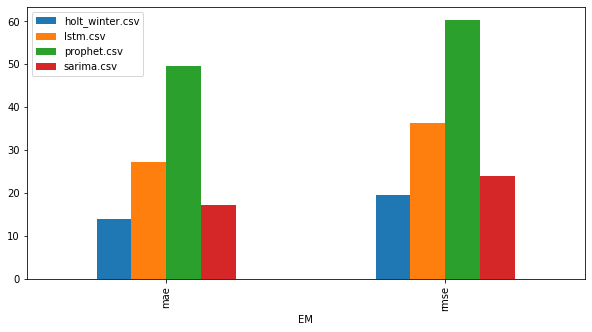

In [130]:
# let's see model wise performance of PM2.5
columns = ['EM','holt_winter.csv', 'lstm.csv', 'prophet.csv', 'sarima.csv']
print('\nPM2.5 Performance with respect to models')
result_PM25 = pd.concat([each_result['PM2.5'] for each_result in results], axis = 1)
result_PM25.columns = os.listdir('result')
display(result_PM25)
result_PM25[1:].reset_index()[columns].plot(x="EM", kind="bar",figsize = (10,5))

- Holt-Winter perform better in detecting PM2.5 than SARIMA, followed by LSTM.
- Prophet performs worst in predicting PM2.5.


PM10 Performance with respect to models


,holt_winter.csv,lstm.csv,prophet.csv,sarima.csv
EM,,,,
mse,683.2383,5603.6942,1393.6985,1864.3875
mae,19.8702,66.4645,26.4389,36.6267
rmse,26.1388,74.8578,37.3323,43.1786


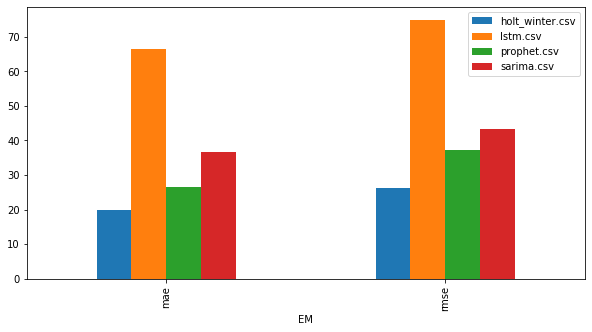

In [132]:
# let's see model wise performance of PM10
print('\nPM10 Performance with respect to models')
result_PM10 = pd.concat([each_result['PM10'] for each_result in results], axis = 1)
result_PM10.columns = os.listdir('result')
display(result_PM10)
result_PM10[1:].reset_index()[columns].plot(x="EM", kind="bar",figsize = (10,5))

- Holt-Winter perform better in detecting PM10 than prophet, followed by SARIMA.
- LSTM performs worst in predicting PM10.


SO2 Performance with respect to models


,holt_winter.csv,lstm.csv,prophet.csv,sarima.csv
EM,,,,
mse,577.0584,55.5452,118.7185,160.7442
mae,21.9392,5.6853,9.2936,12.5583
rmse,24.0220,7.4529,10.8958,12.6785


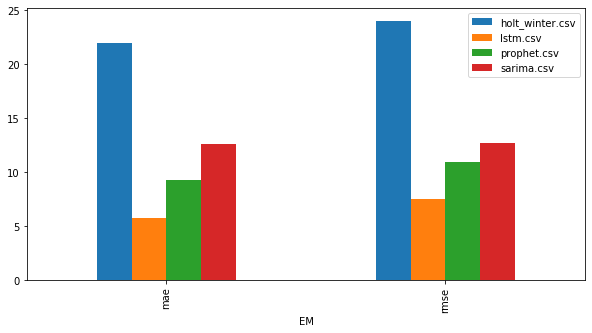

In [133]:
# let's see model wise performance of SO2
print('\nSO2 Performance with respect to models')
result_SO2 = pd.concat([each_result['SO2'] for each_result in results], axis = 1)
result_SO2.columns = os.listdir('result')
display(result_SO2)
result_SO2[1:].reset_index()[columns].plot(x="EM", kind="bar",figsize = (10,5))

- LSTM perform better in predicting SO2 than Prophet, followed by SARIMA.
- Holt-Winter performs worst in predicting SO2.


NO2 Performance with respect to models


,holt_winter.csv,lstm.csv,prophet.csv,sarima.csv
EM,,,,
mse,71.1976,443.2149,117.6427,56.3295
mae,6.9431,16.3812,9.7433,6.5655
rmse,8.4379,21.0527,10.8463,7.5053


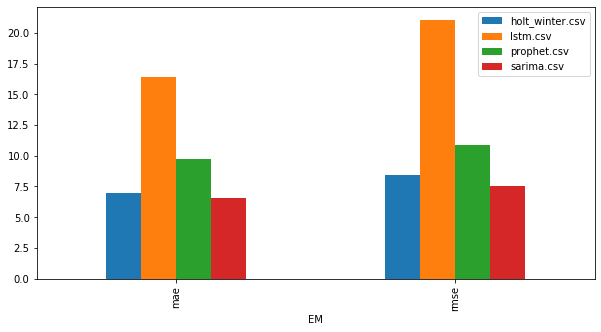

In [134]:
# let's see model wise performance of NO2
print('\nNO2 Performance with respect to models')
result_NO2 = pd.concat([each_result['NO2'] for each_result in results], axis = 1)
result_NO2.columns = os.listdir('result')
display(result_NO2)
result_NO2[1:].reset_index()[columns].plot(x="EM", kind="bar",figsize = (10,5))

- SARIMA performs better in predicting NO2 than Holt-winter, followed by Prophet.
- LSTM performs worst in predicting NO2.


CO Performance with respect to models


,holt_winter.csv,lstm.csv,prophet.csv,sarima.csv
EM,,,,
mse,102336.9931,400684.2145,276937.4953,97352.1214
mae,240.9536,559.9856,444.4292,231.8601
rmse,319.9015,632.9962,526.2485,312.0130


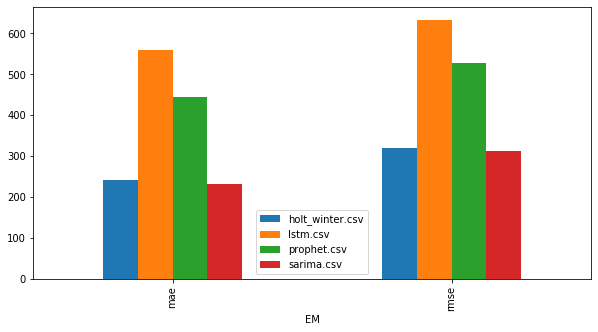

In [135]:
# let's see model wise performance of CO
print('\nCO Performance with respect to models')
result_CO = pd.concat([each_result['CO'] for each_result in results], axis = 1)
result_CO.columns = os.listdir('result')
display(result_CO)
result_CO[1:].reset_index()[columns].plot(x="EM", kind="bar",figsize = (10,5))

- SARIMA performs better in predicting CO than Holt-winter, followed by Prophet.
- LSTM performs worst in predicting CO.


O3 Performance with respect to models


,holt_winter.csv,lstm.csv,prophet.csv,sarima.csv
EM,,,,
mse,138.0659,57.8620,134.6083,96.2532
mae,10.9535,5.8887,9.2992,8.9011
rmse,11.7501,7.6067,11.6021,9.8109


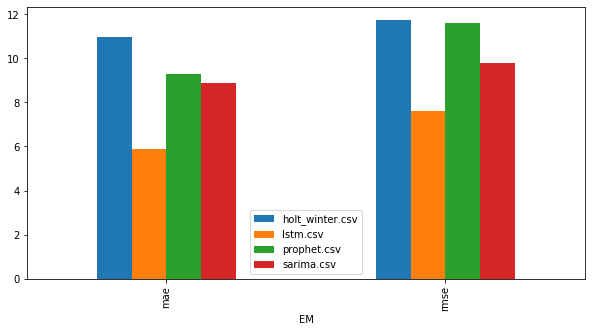

In [136]:
# let's see model wise performance of O3
print('\nO3 Performance with respect to models')
result_O3 = pd.concat([each_result['O3'] for each_result in results], axis = 1)
result_O3.columns = os.listdir('result')
display(result_O3)
result_O3[1:].reset_index()[columns].plot(x="EM", kind="bar",figsize = (10,5))

- LSTM performs better in predicting O3 than SARIMA, followed by Prophet.
- Holt-Winter performs worst in predicting O3.

## Summary
<br>

- PM2.5 best fit : Holt-Winter<br><br>
- PM10 best fit  : Holt-Winter<br><br>
- SO2 best fit   : LSTM<br><br>
- NO2 best fit   : SARIMA<br><br>
- CO best fit    : SARIMA<br><br>
- O3 best fit    : LSTM<br><br>
   
  
## Conclusion
   
Our selected benchmark model SARIMA was able to beat other models only in case of NO2 and CO. On the other hand, LSTM  beat our Benchmark model in case of SO2 and O3.<br><br>
   In this Time Series Analysis project, I just make an attempt to fit these models on real-time data as best as I can. There are still lots of aspects related to these models that are left uncovered due to limited time constraint. Like Hyperparameter Training,  checking multiple methods for stationary data, series decomposition analysis, trend and seasonality analysis etc.<br><br>
   These aspects affects greatly to the performance of the models and contrary takes much more time to tune and apply in real time. That's all for the conclusion part. <br>
   Now we will look at some Future Scope that may improve the project<br>

## Future Scope
- Hyperparameter Tuning
- Forecasting future predictions after achieving good performance score.
- Calculate AQI Index after accurately predicting all the pollutants.
- Deploy the Application to make predictions in real time.
<br>
<br>
<br>
<br>
Happy Coding..!

### References:
1) [An end to end project on time series analysis and forecasting](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b) <br>
2) [FBProphet](https://www.google.com/search?sxsrf=ALeKk01YKsxIDo-AuPRR01NvOGeTNqo8eQ%3A1582574836580&ei=9CxUXtKWI8uf4-EP85uVcA&q=prophet+facebook+wikipedia&oq=prophet+facebook+wi&gs_l=psy-ab.1.1.0j0i22i30l3.17066.19551..21671...0.2..0.435.927.2-2j0j1......0....1..gws-wiz.......0i71j0i67j0i20i263.1ym1Jo8udIk) <br>
3) [Holt-Winters, SARIMA, FBProphet](https://towardsdatascience.com/a-quick-run-through-of-holt-winters-sarima-and-fb-prophet-c6370c6f32f1) <br>
4) [LSTM](https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/) <br>
5) [Time series with keras](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/) <br>
6) [Understanding Input and Output shape in lstm](https://medium.com/@shivajbd/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e)